# importing libaries

In [1]:
import tensorflow
import os
from PIL import Image
from tensorflow import keras
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Loading training dataset

In [2]:
def load_images(floder_):
    images = []
    labels=[]
    print(floder_)
    for filename in os.listdir(floder_):
        classp = os.path.join(floder_, filename)
    
        for img in os.listdir(classp):

            imgp=os.path.join(classp,img)
            image = Image.open(imgp)
            images.append(np.array(image))
            labels.append(int(filename[-1]))

    return np.array(images)/255 , np.array(labels)



In [3]:
trainpath='./train/'
testpath='./test/'


In [4]:
Xtrain,Ytrain=load_images(trainpath)
Xtest,Ytest=load_images(testpath)
print(Ytest)

./train/


./test/
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [5]:
len(Xtrain)
Xtrain.shape

(1500, 32, 32, 3)

# Normalization

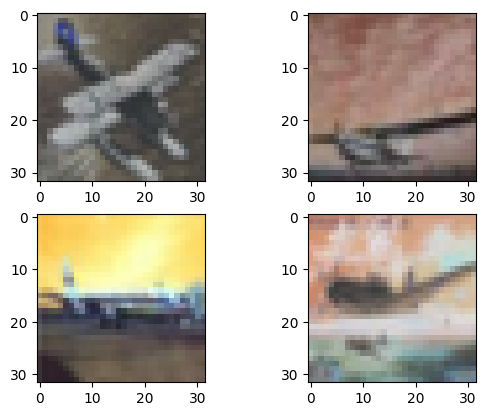

In [6]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 2)
  
axis[0, 0].imshow(Xtrain[0])
axis[0, 1].imshow(Xtrain[1])
axis[1, 0].imshow(Xtrain[2])
axis[1, 1].imshow(Xtrain[3])

# Train Data and Validation Data



In [7]:
from sklearn.model_selection import train_test_split
train,validation,ytrain,y_valid = train_test_split(Xtrain,Ytrain,test_size = 0.1,random_state=42)
print(len(train),len(validation))

1350 150


In [8]:
def flatten_img1(data):
    temp = []
    for m in range(data.shape[0]):
        flatten = []
        for i in range(data.shape[1]):
            for j in range(data.shape[2]):
                for k in range(data.shape[3]):
                    flatten.append(data[m][i][j][k])

        temp.append(flatten)
    return np.array(temp)

# Flattening data

In [9]:
train_trf = flatten_img1(train)
valid_trf = flatten_img1(validation)

# FCNN

In [10]:
def FCNN(xtrain,ytrain,xvalid,yvalid,epochs,batch_size):
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape = (32*32*3,)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(3,activation='softmax')) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),batch_size=batch_size,epochs=epochs)

    return history,model

# Accuracy Score

In [11]:
def Model_Accuracy(ytest,pred_y):
    wrong_count = 0
    for i in range(len(ytest)):
         wrong_count += (ytest[i] != pred_y[i])

    acc1 = round((len(ytest) - wrong_count)/len(ytest) * 100,2)

    print(f"Accuracy  = {acc1}%")

In [12]:
history,model = FCNN(train_trf,ytrain,valid_trf,y_valid,500,200)

Epoch 1/500
7/7 [==============================] - 1s 52ms/step - loss: 1.3553 - accuracy: 0.3237 - val_loss: 1.1631 - val_accuracy: 0.2867
Epoch 2/500
7/7 [==============================] - 0s 24ms/step - loss: 1.0430 - accuracy: 0.4896 - val_loss: 1.0076 - val_accuracy: 0.5200
Epoch 3/500
7/7 [==============================] - 0s 25ms/step - loss: 0.9394 - accuracy: 0.5859 - val_loss: 0.9318 - val_accuracy: 0.5667
Epoch 4/500
7/7 [==============================] - 0s 26ms/step - loss: 0.8535 - accuracy: 0.6563 - val_loss: 0.8600 - val_accuracy: 0.6200
Epoch 5/500
7/7 [==============================] - 0s 29ms/step - loss: 0.8268 - accuracy: 0.6281 - val_loss: 0.8996 - val_accuracy: 0.6000
Epoch 6/500
7/7 [==============================] - 0s 27ms/step - loss: 0.7818 - accuracy: 0.6652 - val_loss: 0.8133 - val_accuracy: 0.6533
Epoch 7/500
7/7 [==============================] - 0s 25ms/step - loss: 0.7461 - accuracy: 0.6978 - val_loss: 0.9159 - val_accuracy: 0.6200
Epoch 8/500
7/7 [===

Text(0, 0.5, 'val_accuracy')

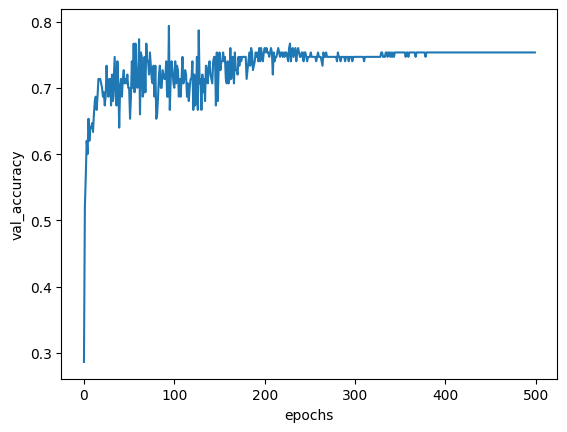

In [13]:

plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')


# Prediction

In [14]:
test_trf = flatten_img1(Xtest)
pred = model.predict(test_trf)
pred_y = [np.where(pred[i] == max(pred[i]))[0][0] for i in range(pred.shape[0])]
(pred_y,Ytest)
acc=accuracy_score(Ytest,pred_y)
acc




10/10 [==============================] - 0s 2ms/step


0.7533333333333333

In [15]:
loss = model.evaluate(test_trf,Ytest)[0]
loss


 1/10 [==>...........................] - ETA: 0s - loss: 3.3845 - accuracy: 0.7812

10/10 [==============================] - 0s 3ms/step - loss: 2.8536 - accuracy: 0.7533


2.853571653366089

# CNN

In [16]:
from sklearn.model_selection import train_test_split
Ctrain,Cvalidation,Cytrain,Cy_valid = train_test_split(Xtrain,Ytrain,test_size = 0.1,random_state=42)
print(len(Ctrain),len(Cvalidation))
Ctrain[0].shape

1350 150


(32, 32, 3)

In [17]:
def CNN(xtrain,ytrain,xvalid,yvalid,epochs,batch_size):
    model = Sequential()
    model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape = (32,32,3,)))
    model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
    model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
    model.add(Flatten())
    
    model.add(Dense(512,activation='relu'))
    model.add(Dense(100,activation='relu')) 
    model.add(Dense(100,activation='softmax')) 


    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),batch_size=batch_size,epochs=epochs)

    return history,model

In [18]:
history_CNN,modelC=CNN(Ctrain,Cytrain,Cvalidation,Cy_valid,50,200)


Epoch 1/50
7/7 [==============================] - 10s 1s/step - loss: 2.6188 - accuracy: 0.2926 - val_loss: 1.2786 - val_accuracy: 0.3400
Epoch 2/50
7/7 [==============================] - 7s 978ms/step - loss: 1.3886 - accuracy: 0.3259 - val_loss: 1.2263 - val_accuracy: 0.2733
Epoch 3/50
7/7 [==============================] - 7s 954ms/step - loss: 1.1359 - accuracy: 0.3474 - val_loss: 1.1850 - val_accuracy: 0.4000
Epoch 4/50
7/7 [==============================] - 7s 945ms/step - loss: 1.1345 - accuracy: 0.3600 - val_loss: 1.0685 - val_accuracy: 0.4200
Epoch 5/50
7/7 [==============================] - 7s 974ms/step - loss: 1.0902 - accuracy: 0.4015 - val_loss: 1.1116 - val_accuracy: 0.3533
Epoch 6/50
7/7 [==============================] - 7s 966ms/step - loss: 1.0677 - accuracy: 0.4393 - val_loss: 1.0442 - val_accuracy: 0.4400
Epoch 7/50
7/7 [==============================] - 7s 1s/step - loss: 1.0119 - accuracy: 0.5030 - val_loss: 1.0223 - val_accuracy: 0.4400
Epoch 8/50
7/7 [=========

Text(0, 0.5, 'val_accuracy')

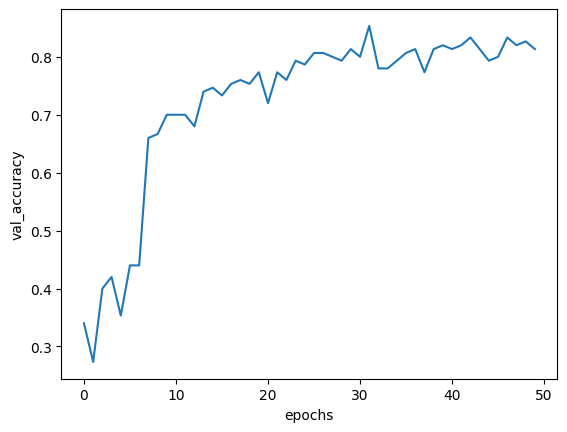

In [19]:
# history.history['val_accuracy']
plt.plot(history_CNN.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')


# Predicting


In [20]:
CNN_test=(Xtest)
CNN_pred=modelC.predict(CNN_test)

10/10 [==============================] - 0s 27ms/step


In [21]:
print(CNN_pred)
CNNpred_Y = [np.where(CNN_pred[i] == max(CNN_pred[i]))[0][0] for i in range(CNN_pred.shape[0])]
CNNpred_Y



[[9.9999964e-01 3.1461909e-07 1.2588291e-08 ... 7.5895399e-23
  2.9452344e-15 3.4917247e-16]
 [9.5081162e-01 1.7280021e-06 4.9186695e-02 ... 2.2103688e-20
  5.1193799e-13 1.3376134e-14]
 [9.9999952e-01 1.7148746e-16 4.6417838e-07 ... 6.7357418e-38
  5.2544510e-24 1.7322298e-26]
 ...
 [2.7662142e-10 9.3954551e-09 1.0000000e+00 ... 1.8949795e-26
  1.8416877e-17 3.2688089e-22]
 [2.8042955e-04 1.0918833e-07 9.9971944e-01 ... 5.3264059e-17
  4.3996851e-11 2.2058980e-13]
 [1.7535591e-03 1.0143242e-08 9.9824643e-01 ... 3.9605699e-23
  6.5907925e-14 1.0821894e-16]]


[0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 2,


# COnfusion Matrix

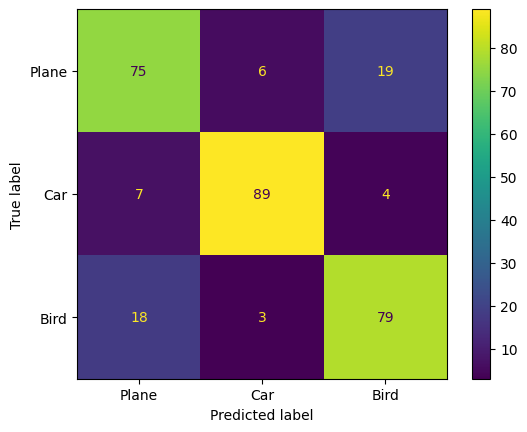

In [22]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
CM=confusion_matrix(Ytest,CNNpred_Y)
ConfusionMatrixDisplay(CM,display_labels=['Plane','Car','Bird']).plot()



# Test accuracy

In [23]:

accuracy=accuracy_score(Ytest,CNNpred_Y)
accuracy

0.81